Text(0.5, 1.0, 'Given tuples')

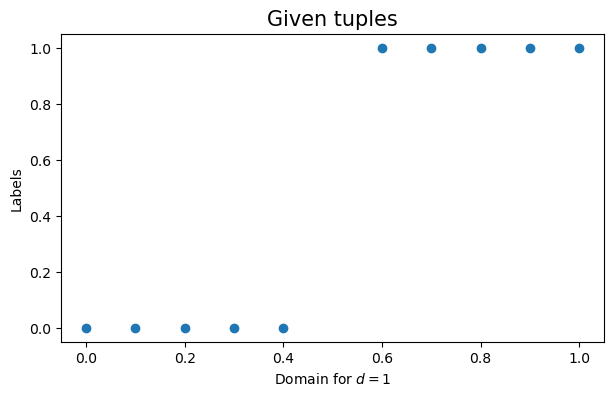

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random
from math import log
a = []
for i in range(5):   
    a.append(0)
for i in range(6,11):   
    a.append(1)
b = [];k = 0;s = 1
for i in range(5):   
    b.append(k);k+=0.1
for i in range(6,11):   
    b.append(s);s-=0.1
plt.figure(figsize=(7, 4))
plt.scatter(b,a)
plt.xlabel('Domain for $d = 1$',fontsize = 10)
plt.ylabel('Labels',fontsize = 10)
plt.title('Given tuples',fontsize = 15)    

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test = train_test_split(b,a,train_size = 0.2)
x_train=np.reshape(x_train,(-1,1))
x_test=np.reshape(x_test,(-1,1))
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
knn_model = KNeighborsRegressor(n_neighbors = 1)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print('Accuracy for k-NN: ', accuracy_score(y_test,y_pred), precision_score(y_test,y_pred),
      recall_score(y_test,y_pred), f1_score(y_test,y_pred))
classifier.fit(x_train, y_train)
ypred = classifier.predict(x_test)
print('Accuracy for Naive Bayes: ', accuracy_score(y_test, ypred))

Accuracy for k-NN:  1.0 1.0 1.0 1.0
Accuracy for Naive Bayes:  1.0


In [3]:
c = b;p = np.array([list(p) for p in zip(c,b)]).reshape(10,2)
x_train,x_test,y_train,y_test = train_test_split(p,a,train_size = 0.4)
knn_model = KNeighborsRegressor(n_neighbors = 1)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print('Accuracy for k-NN: ', accuracy_score(y_test,y_pred))
classifier = GaussianNB()
classifier.fit(x_train, y_train)
print('Accuracy for Naive Bayes: ', accuracy_score(y_test, y_pred))
d = c;p = np.array([list(p) for p in zip(c,b,d)]).reshape(10,3)
x_train,x_test,y_train,y_test = train_test_split(p,a,train_size = 0.5)
knn_model = KNeighborsRegressor(n_neighbors = 1)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print('Accuracy for k-NN: ', accuracy_score(y_test,y_pred))
classifier.fit(x_train, y_train)
print('Accuracy for Naive Bayes: ', accuracy_score(y_test, y_pred))

Accuracy for k-NN:  1.0
Accuracy for Naive Bayes:  1.0
Accuracy for k-NN:  1.0
Accuracy for Naive Bayes:  1.0


Accuracy for k-NN:  1.0
Accuracy for Naive Bayes:  1.0


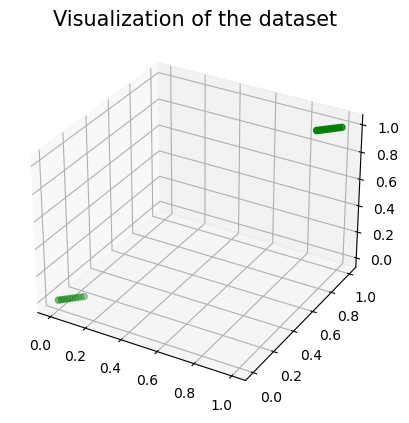

In [148]:
ax = plt.axes(projection ="3d");a = []
for i in range(10):   
    a.append(0)
for i in range(11,21):   
    a.append(1)
c = b = [];k = 0;s = 1
for i in range(10):   
    b.append(k);k+=0.01
for i in range(11,21):   
    b.append(s);s-=0.01
ax.scatter3D(c, b, a, color = "green")
plt.title('Visualization of the dataset',fontsize = 15) 
x_train,x_test,y_train,y_test=train_test_split(np.array([list(p) for p in zip(c,b)]).reshape(20,2),a,train_size = 0.2)
knn_model = KNeighborsRegressor(n_neighbors = 1)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print('Accuracy for k-NN: ', accuracy_score(y_test,y_pred))
classifier.fit(x_train, y_train)
print('Accuracy for Naive Bayes: ', accuracy_score(y_test, y_pred))

[[0.02991795 0.03628374 0.09100858 0.03184263 0.05188169 0.20335649]
 [0.02820035 0.22487201 0.03374322 0.32017611 0.04515021 0.02069308]
 [0.12654095 0.0975448  0.05164403 0.06965786 0.36012539 0.04868678]
 [0.18751698 0.00367434 0.03507255 0.11654876 0.07916311 0.01200885]
 [0.10219448 0.02788615 0.01053972 0.1311842  0.11239608 0.0417809 ]
 [0.01452697 0.09061659 0.07468373 0.14931175 0.16859052 0.35958583]
 [0.05076575 0.12352775 0.10478572 0.11602299 0.00455467 0.01574072]
 [0.11883361 0.02960798 0.01426705 0.03843274 0.1535961  0.09577838]
 [0.0206977  0.04392869 0.16992987 0.07993047 0.0366878  0.11112712]
 [0.19563009 0.04066406 0.06720811 0.01179638 0.00830208 0.09732095]]


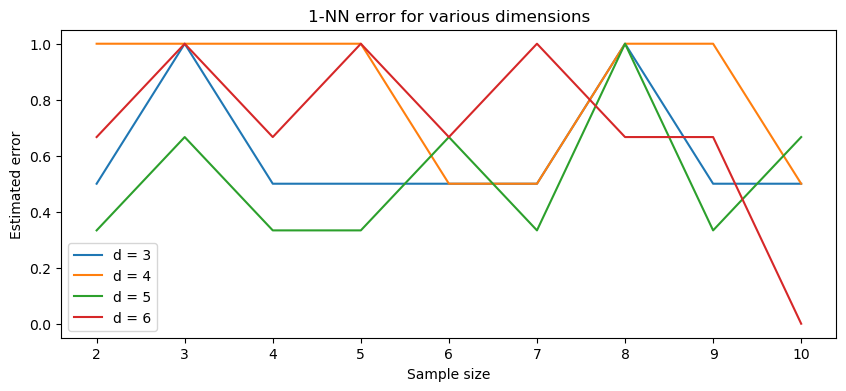

In [17]:
d = 7; m = 11; n = np.arange(2,m);l = [];rng = np.random.default_rng();err = 1e-3;c = random.randrange(2)
for j in range(3,d):
    e = []
    for i in range(2,m):
        x = rng.exponential(scale=0.1, size=(i,j));y = np.array([0]*len(x[0]));y[0] = c
        for k in range(len(y)-1):
            if np.linalg.norm(np.subtract(x[:,k],x[:,k+1]))<err:
                y[k+1] = y[k]
            else:
                y[k+1] = 1-y[k]
        X_train, X_test, y_train, y_test = train_test_split(np.transpose(x), y, test_size = 0.5)
        knn1 = KNeighborsRegressor(n_neighbors = 1)
        knn1.fit(X_train, y_train) 
        e.append(1-accuracy_score(y_test, knn1.predict(X_test)))
    l.append(e)
print(x)    
plt.figure(figsize=(10, 4))
for s in range(len(l)):    
    plt.plot(n,l[s],label = "d = %i"%(s+3))
plt.xlabel('Sample size')
plt.ylabel('Estimated error')
plt.title('1-NN error for various dimensions')
plt.legend();plt.show()

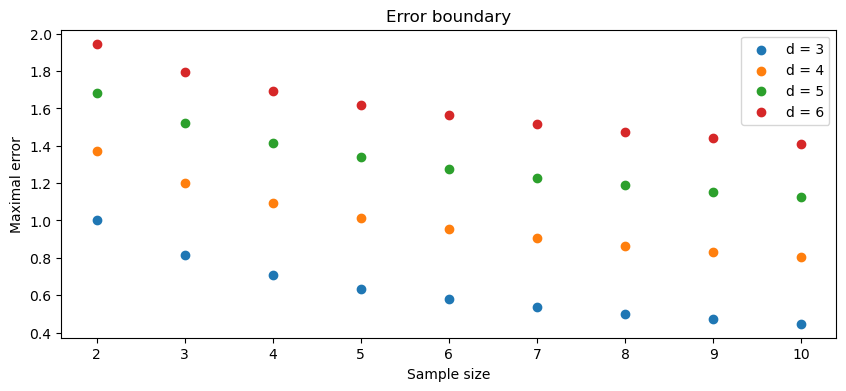

In [19]:
from math import sqrt
plt.figure(figsize=(10, 4))
for s in range(len(l)):   
    z = [sqrt(s+2)*i**(-1/(s+2)) for i in n]
    plt.scatter(n,z,label = "d = %i"%(s+3))
plt.xlabel('Sample size')
plt.ylabel('Maximal error')
plt.title('Error boundary')
plt.legend();plt.show()